In [27]:
# import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [28]:
# Read data

df = pd.read_csv(r"F:\DataScience Python\Machine Learning\Models\UnSupervised Learning\Hierarchical Clustering\Dataset\google_review_ratings.csv")
df.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


In [29]:
# Explore data

df.shape

(5456, 26)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5456 non-null   object 
 1   Category 1   5456 non-null   float64
 2   Category 2   5456 non-null   float64
 3   Category 3   5456 non-null   float64
 4   Category 4   5456 non-null   float64
 5   Category 5   5456 non-null   float64
 6   Category 6   5456 non-null   float64
 7   Category 7   5456 non-null   float64
 8   Category 8   5456 non-null   float64
 9   Category 9   5456 non-null   float64
 10  Category 10  5456 non-null   float64
 11  Category 11  5456 non-null   object 
 12  Category 12  5455 non-null   float64
 13  Category 13  5456 non-null   float64
 14  Category 14  5456 non-null   float64
 15  Category 15  5456 non-null   float64
 16  Category 16  5456 non-null   float64
 17  Category 17  5456 non-null   float64
 18  Category 18  5456 non-null   float64
 19  Catego

In [31]:
df.describe()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,...,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000,2.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,...,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560755,1.810000
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,...,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171756,1.088944
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.040000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,...,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000,1.425000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,...,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000,1.810000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,...,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000,2.195000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.580000


In [32]:
# removing missing columns

df.drop(['Unnamed: 25'], axis = 1, inplace = True)
df.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [33]:
# Check for Null values

missing = [i for i in df.columns if df[i].isnull().sum() > 0]
missing

['Category 12', 'Category 24']

In [34]:
# # Treating missing values:

# for i in missing:
#     df[i].fillna(df[i].mode()[0])
#     df[i] = pd.to_numeric(df[i],errors = 'coerce')

# Droping  missing values

df.dropna(inplace = True)

In [35]:
# Checking missing values After treating

missing = [i for i in df.columns if df[i].isnull().sum() > 0]
missing

[]

In [36]:
# Categorical columns

cat_cols = list(df.select_dtypes(include = 'O'))
print(f'Categorical Columns: {cat_cols}')

Categorical Columns: ['User', 'Category 11']


In [37]:
# Numerical columns

num_cols = list(df.select_dtypes(exclude = 'O'))
print(f'Numerical Columns: {num_cols}')

Numerical Columns: ['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5', 'Category 6', 'Category 7', 'Category 8', 'Category 9', 'Category 10', 'Category 12', 'Category 13', 'Category 14', 'Category 15', 'Category 16', 'Category 17', 'Category 18', 'Category 19', 'Category 20', 'Category 21', 'Category 22', 'Category 23', 'Category 24']


In [42]:
# Replacing  columns names

col=['User','churches','resorts','beaches','parks','theatres','museums','malls',
    'zoo','restaurants','pubs/bars','local services','burger/pizza shops','hotels/other lodgings',
    'juice bars','art galleries','dance clubs','swimming pools','gyms','bakeries',
    'beauty & spas','cafes','viewpoints','monuments','gardens']

df= df.set_axis(col, axis=1, inplace=False)

df.head()

,User,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,...,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,viewpoints,monuments,gardens
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [45]:
# Drop column User

df.drop('User', axis = 1, inplace = True)

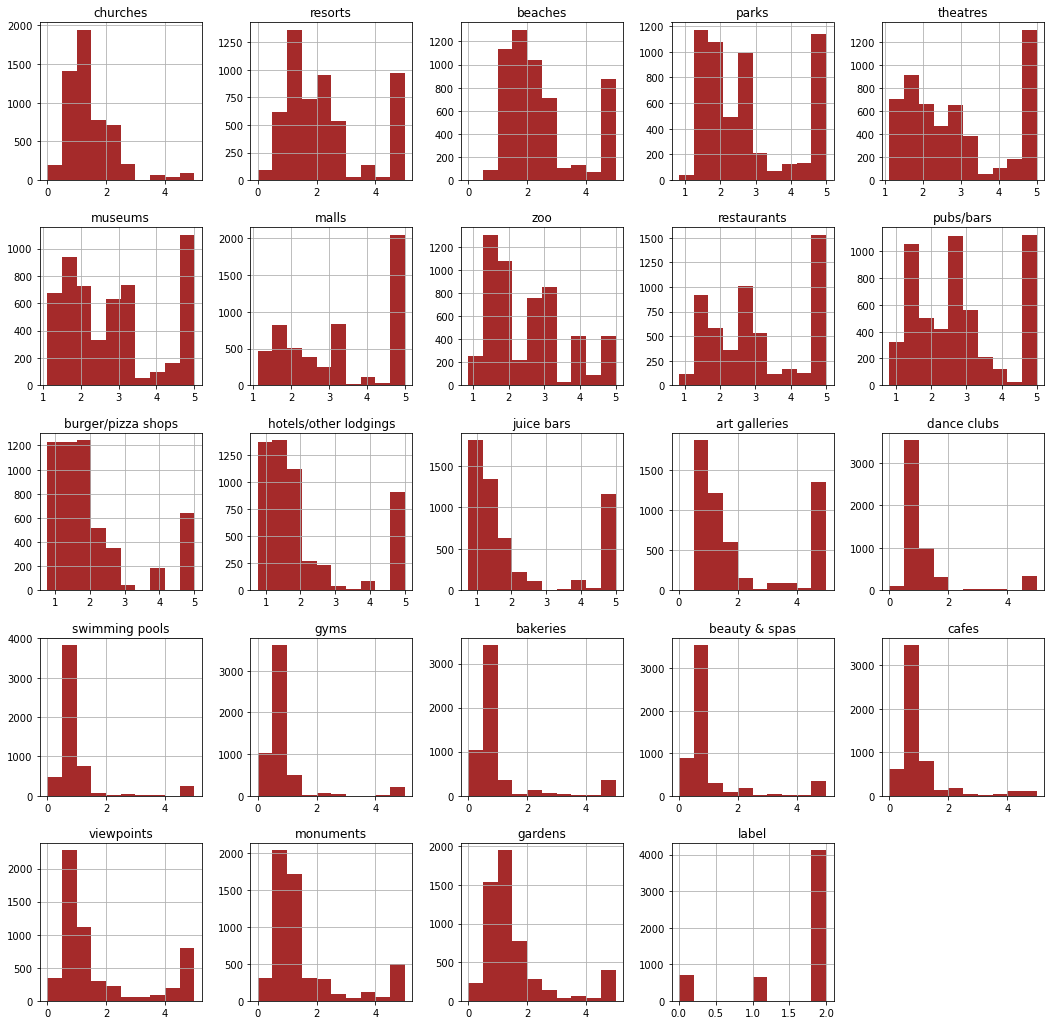

In [89]:
fig = df.hist(figsize = (18,18),color="brown")

In [46]:
from sklearn.preprocessing import normalize

df_scaled = normalize(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs/bars,...,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,viewpoints,monuments,gardens
0,0.0,0.000000,0.333580,0.335418,0.459476,0.268334,0.459476,0.215954,0.214116,0.242603,...,0.159898,0.054218,0.045948,0.0,0.045948,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.331487,0.333313,0.456593,0.266651,0.456593,0.241081,0.212773,0.241995,...,0.158895,0.053878,0.045659,0.0,0.045659,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.331762,0.331762,0.456972,0.266872,0.456972,0.241281,0.212949,0.241281,...,0.159026,0.053923,0.045697,0.0,0.045697,0.0,0.0,0.0,0.0,0.0
3,0.0,0.045907,0.333288,0.333288,0.459075,0.268100,0.459075,0.215765,0.213929,0.242391,...,0.159758,0.054171,0.045907,0.0,0.045907,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.331762,0.331762,0.456972,0.266872,0.456972,0.241281,0.212949,0.241281,...,0.159026,0.053923,0.045697,0.0,0.045697,0.0,0.0,0.0,0.0,0.0


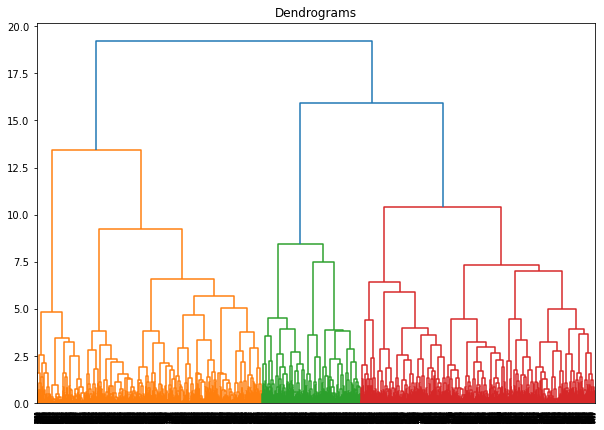

In [47]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

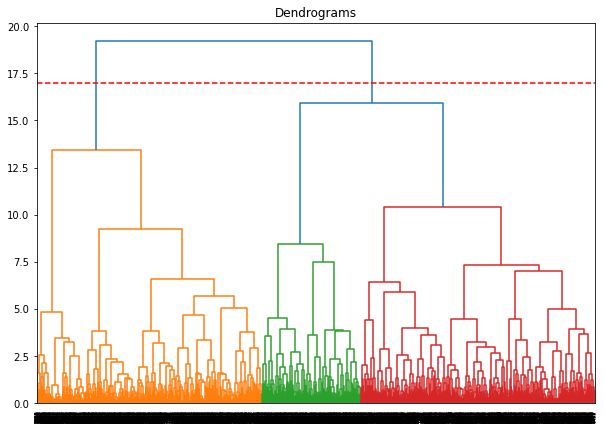

In [77]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_scaled, method='ward'))
plt.axhline(y = 17, color='r', linestyle='--')

In [78]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 3, affinity='manhattan', linkage='average')  
cluster.fit_predict(df_scaled)

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

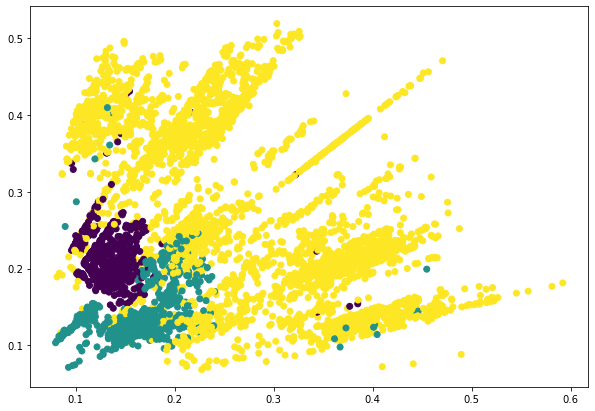

In [79]:
plt.figure(figsize=(10, 7))  
plt.scatter(df_scaled['theatres'], df_scaled['restaurants'], c = cluster.labels_)

In [88]:
df['label'] = cluster.labels_
df.sample(5)

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs/bars,...,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,viewpoints,monuments,gardens,label
628,1.38,1.40,1.42,1.44,2.64,3.28,3.27,3.29,5.00,5.00,...,5.00,0.00,0.00,0.00,0.00,0.00,0.78,1.42,1.38,2
5394,2.61,2.55,2.44,1.36,1.83,1.31,1.30,1.61,1.60,1.60,...,0.90,0.94,0.96,0.82,0.88,4.40,3.64,3.69,2.62,1
4573,1.31,1.33,1.36,5.00,2.91,2.83,2.40,1.68,5.00,4.96,...,1.63,0.59,0.58,0.60,0.75,5.00,5.00,1.33,1.30,2
2855,1.31,1.30,1.39,4.75,4.18,5.00,5.00,2.42,2.41,1.69,...,0.83,0.86,0.58,0.56,0.55,0.57,0.69,4.75,1.17,2
292,2.19,2.44,5.00,1.98,2.38,3.91,4.22,2.87,3.48,3.11,...,0.95,0.91,0.78,0.83,0.82,0.84,4.22,5.00,1.60,2
